#  Predicción de precios en el mercado de autos usados a partir de características

En el mercado de automóviles de segunda mano, determinar el valor exacto de un vehículo es un desafío debido a la gran cantidad de variables que influyen en su precio. Tanto compradores como vendedores enfrentan la incertidumbre de establecer un valor justo, lo que a menudo resulta en transacciones que no reflejan el verdadero valor del auto. Esto puede conducir a pérdidas significativas, ya sea por pagar de más o recibir menos de lo que el vehículo realmente vale. Tradicionalmente, el precio se ha calculado en función de la intuición o el conocimiento personal sobre autos, métodos que, aunque útiles, carecen de precisión y pueden fallar.
Para mejorar la precisión en la valoración de automóviles usados, hemos desarrollado un sistema basado en técnicas avanzadas de data science y machine learning. Este sistema organiza y analiza una base de datos exhaustiva de vehículos, permitiendo realizar comparaciones detalladas entre diferentes opciones. Al emplear modelos de machine learning, podemos identificar patrones complejos y hacer predicciones precisas, tomando en cuenta una variedad de factores críticos que influyen en el precio del auto. Estos factores incluyen el tiempo de uso, el estado de las distintas piezas, el historial de mantenimiento, la demanda del modelo en el mercado, y las fluctuaciones en los precios a lo largo del tiempo.
Gracias a este enfoque, logramos una predicción de precios significativamente más precisa, superando las estimaciones basadas únicamente en la intuición. Este sistema no solo aporta mayor confianza a compradores y vendedores, sino que también optimiza el proceso de compra-venta, ahorrando tiempo y minimizando riesgos financieros.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime

In [2]:
df = pd.read_csv("Mazda ChileAutos.csv", delimiter=";")
df.head()

,id,enlace,titulo,marca,modelo,motor,combustible,kilometraje,transmision,precio,localidad,region
0,CL-AD-14735282,https://www.chileautos.cl/vehiculos/detalles/2...,2013 Mazda 6 2.0 Skyactiv-G LE Auto,MAZDA,MAZDA6,20.0,Bencina,103900,Automatica,10000000.0,Puente Alto,NaN
1,CL-AD-15499247,https://www.chileautos.cl/vehiculos/detalles/2...,2020 Mazda Bt-50 3.2 DSL SDX Auto Hi Rider 4WD,MAZDA,BT-50,32.0,Diesel,92000,Automatica,20900000.0,Vitacura,NaN
2,CL-AD-15185232,https://www.chileautos.cl/vehiculos/detalles/2...,2019 Mazda Bt-50 2.2 DSL Manual SDX 4WD,MAZDA,BT-50,22.0,Diesel,94000,Manual,21700000.0,Galvarino,Araucania
3,CL-AD-15158840,https://www.chileautos.cl/vehiculos/detalles/2...,2020 Mazda 3 Sport,NaN,NaN,NaN,Bencina,25000,Automatica,19800000.0,Vina del Mar,Valparaiso
4,CP-AD-8267126,https://www.chileautos.cl/vehiculos/detalles/2...,2013 Mazda 2 1.5 V,MAZDA,MAZDA2,15.0,Bencina,61450,Manual,7390000.0,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1012 non-null   object 
 1   enlace       1012 non-null   object 
 2   titulo       1012 non-null   object 
 3   marca        708 non-null    object 
 4   modelo       707 non-null    object 
 5   motor        707 non-null    float64
 6   combustible  1011 non-null   object 
 7   kilometraje  1012 non-null   object 
 8   transmision  1012 non-null   object 
 9   precio       1012 non-null   object 
 10  localidad    928 non-null    object 
 11  region       300 non-null    object 
dtypes: float64(1), object(11)
memory usage: 95.0+ KB


In [4]:
df.isnull().sum()

id               0
enlace           0
titulo           0
marca          304
modelo         305
motor          305
combustible      1
kilometraje      0
transmision      0
precio           0
localidad       84
region         712
dtype: int64

In [5]:
df.drop(columns="id", inplace=True)

In [6]:
display(df.iloc[142,:])
df.drop(index=142, inplace=True)

enlace         https://www.chileautos.cl/vehiculos/detalles/2...
titulo         2015 Mazda Cx-5 Tapiz de cuero 4x4 Techo corre...
marca                                                        etc
modelo                                                       NaN
motor                                                        NaN
combustible                                                  NaN
kilometraje                                              Bencina
transmision                                               117000
precio                                                Automatica
localidad                                             12900000.0
region                                                Las Condes
Name: 142, dtype: object

In [7]:
df["kilometraje"] = pd.to_numeric(df.kilometraje)
df["precio"] = pd.to_numeric(df.precio) / 1_000_000
df["motor"] = df.motor / 10

In [8]:
df.describe()

,motor,kilometraje,precio
count,707.000000,1.011000e+03,1011.000000
mean,2.120226,9.397048e+04,14.148456
std,0.430759,9.085675e+04,5.511897
min,1.500000,1.400000e+02,3.700000
25%,2.000000,4.950000e+04,10.190000
50%,2.000000,8.300000e+04,13.500000
75%,2.200000,1.217500e+05,17.500000
max,3.700000,2.300000e+06,37.900000


## Obtener año

In [9]:
df['año'] = df['titulo'].str.extract(r'(\b\d{4}\b)')

# Convertir la columna 'año' a un tipo de dato numérico
df['año'] = pd.to_numeric(df['año'])
df

,enlace,titulo,marca,modelo,motor,combustible,kilometraje,transmision,precio,localidad,region,año
0,https://www.chileautos.cl/vehiculos/detalles/2...,2013 Mazda 6 2.0 Skyactiv-G LE Auto,MAZDA,MAZDA6,2.0,Bencina,103900,Automatica,10.00,Puente Alto,NaN,2013
1,https://www.chileautos.cl/vehiculos/detalles/2...,2020 Mazda Bt-50 3.2 DSL SDX Auto Hi Rider 4WD,MAZDA,BT-50,3.2,Diesel,92000,Automatica,20.90,Vitacura,NaN,2020
2,https://www.chileautos.cl/vehiculos/detalles/2...,2019 Mazda Bt-50 2.2 DSL Manual SDX 4WD,MAZDA,BT-50,2.2,Diesel,94000,Manual,21.70,Galvarino,Araucania,2019
3,https://www.chileautos.cl/vehiculos/detalles/2...,2020 Mazda 3 Sport,NaN,NaN,NaN,Bencina,25000,Automatica,19.80,Vina del Mar,Valparaiso,2020
4,https://www.chileautos.cl/vehiculos/detalles/2...,2013 Mazda 2 1.5 V,MAZDA,MAZDA2,1.5,Bencina,61450,Manual,7.39,NaN,NaN,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
1007,https://www.chileautos.cl/vehiculos/detalles/2...,2015 Mazda 3 Sport,NaN,NaN,NaN,Bencina,146000,Manual,10.50,Concon,Valparaiso,2015
1008,https://www.chileautos.cl/vehiculos/detalles/2...,2016 Mazda 3 2.0 Auto Skyactiv-G V SR,MAZDA,MAZDA3,2.0,Bencina,60000,Automatica,11.20,Colina,NaN,2016
1009,https://www.chileautos.cl/vehiculos/detalles/2...,2020 Mazda Cx-5 2.0 Manual Skyactiv R,MAZDA,CX-5,2.0,Bencina,71000,Manual,17.29,Puerto Varas,Los Lagos,2020
1010,https://www.chileautos.cl/vehiculos/detalles/2...,2021 Mazda Cx-5 2.0 Skyactiv R Auto,MAZDA,CX-5,2.0,Bencina,27500,Automatica,19.75,Santiago,NaN,2021


In [10]:
regiones = {'Región Metropolitana de Santiago':['Puente Alto', 'Vitacura', 'La Reina', 'Las Condes',
                     'Lo Barnechea', 'Huechuraba', 'Colina', 'Santiago',
                     'San Joaquin', 'Independencia', 'La Florida', 'Providencia',
                     'Cerrillos', 'Nunoa', 'Maipu', 'Renca', 'Quinta Normal', 'Penalolen',
                     'Buin', 'San Miguel', 'San Bernardo', 'La Cisterna', 'Macul',
                     'Estacion Central', 'Talagante', 'Pedro Aguirre Cerda', 'Melipilla',
                     'San Fernando', 'Conchali', 'Lampa', 'Penaflor', 'Recoleta', 'Pudahuel',
                     'Lo Espejo', 'Padre Hurtado', 'San Ramon', 'Pirque', 'Isla de Maipo',
                     'Curacavi', 'Cerro Navia', 'Lo Prado', 'El Monte', 'El Bosque',
                     'La Granja', 'Calera de Tango', 'La Ligua', 'Rinconada'],
            'Región de Valparaíso' : ['Vina del Mar', 'Valparaiso', 'Villa Alemana', 'Quilpue', 'Los Andes', 
                    'Algarrobo', 'Concon', 'Quintero', 'Quillota', 'San Antonio', 'Zapallar',
                    'La Cruz', 'Casablanca', 'Limache', 'Puchuncavi', 'San Felipe' 'Peralillo', 'La Calera'],
            "Región del Libertador Bernardo O'Higgins" : ['Machali', 'Rancagua', 'Chimbarongo', 'Requinoa', 'Rengo', 'Peralillo', 'OHiggins', 'San Fernando' ],
            'Región de Ñuble' : ['Bulnes', 'Chillan', 'Nuble', 'San Carlos'],
            'Región de Coquimbo': ['Ovalle', 'Coquimbo', 'La Serena', 'Salamanca'],
            'Región del Maule': ['Rauco', 'Maule', 'Talca', 'Curico', 'Linares'],
            'Región de La Araucanía': ['Galvarino', 'Araucania', 'Temuco', 'Pucon', 'Villarrica', 'Angol', 'Victoria', 'Padre de las casas'],
            'Región de Atacama': ['Copiapo'],
            'Región de Antofagasta': ['Calama', 'Antofagasta'],
            'Región del Bío-Bío' : ['Bio Bio', 'Concepcion', 'Los Angeles', 'Chiguayante', 'San Pedro de la Paz', 'Penco', 'Cabrero', 'Talcahuano'],
            'Región de Los Ríos' : ['Los Rios', 'La Union', 'Panguipulli', 'Valdivia', 'Rio Bueno'],
            'Región de Los Lagos' : ['Los Lagos', 'Llanquihue', 'Puerto Varas', 'Osorno', 'Frutillar', 'Puerto Montt'],
            'Región de Aysén del Gral.Ibañez del Campo' : ['Cisnes']}

def obtener_region(localidad):
    for region, localidades in regiones.items():
        if localidad in localidades:
            return region
    return None

df['region'] = df['localidad'].apply(obtener_region)
df.isnull().sum()

enlace           0
titulo           0
marca          304
modelo         304
motor          304
combustible      0
kilometraje      0
transmision      0
precio           0
localidad       84
region          97
año              0
dtype: int64

## Análisis de datos exploratorio

In [11]:
sns.set_context("paper")

In [12]:
df_eda = df.iloc[:,2:].copy()
df_eda

,marca,modelo,motor,combustible,kilometraje,transmision,precio,localidad,region,año
0,MAZDA,MAZDA6,2.0,Bencina,103900,Automatica,10.00,Puente Alto,Región Metropolitana de Santiago,2013
1,MAZDA,BT-50,3.2,Diesel,92000,Automatica,20.90,Vitacura,Región Metropolitana de Santiago,2020
2,MAZDA,BT-50,2.2,Diesel,94000,Manual,21.70,Galvarino,Región de La Araucanía,2019
3,NaN,NaN,NaN,Bencina,25000,Automatica,19.80,Vina del Mar,Región de Valparaíso,2020
4,MAZDA,MAZDA2,1.5,Bencina,61450,Manual,7.39,NaN,None,2013
...,...,...,...,...,...,...,...,...,...,...
1007,NaN,NaN,NaN,Bencina,146000,Manual,10.50,Concon,Región de Valparaíso,2015
1008,MAZDA,MAZDA3,2.0,Bencina,60000,Automatica,11.20,Colina,Región Metropolitana de Santiago,2016
1009,MAZDA,CX-5,2.0,Bencina,71000,Manual,17.29,Puerto Varas,Región de Los Lagos,2020
1010,MAZDA,CX-5,2.0,Bencina,27500,Automatica,19.75,Santiago,Región Metropolitana de Santiago,2021


### Precio

In [13]:
df_eda.precio.describe()

count    1011.000000
mean       14.148456
std         5.511897
min         3.700000
25%        10.190000
50%        13.500000
75%        17.500000
max        37.900000
Name: precio, dtype: float64

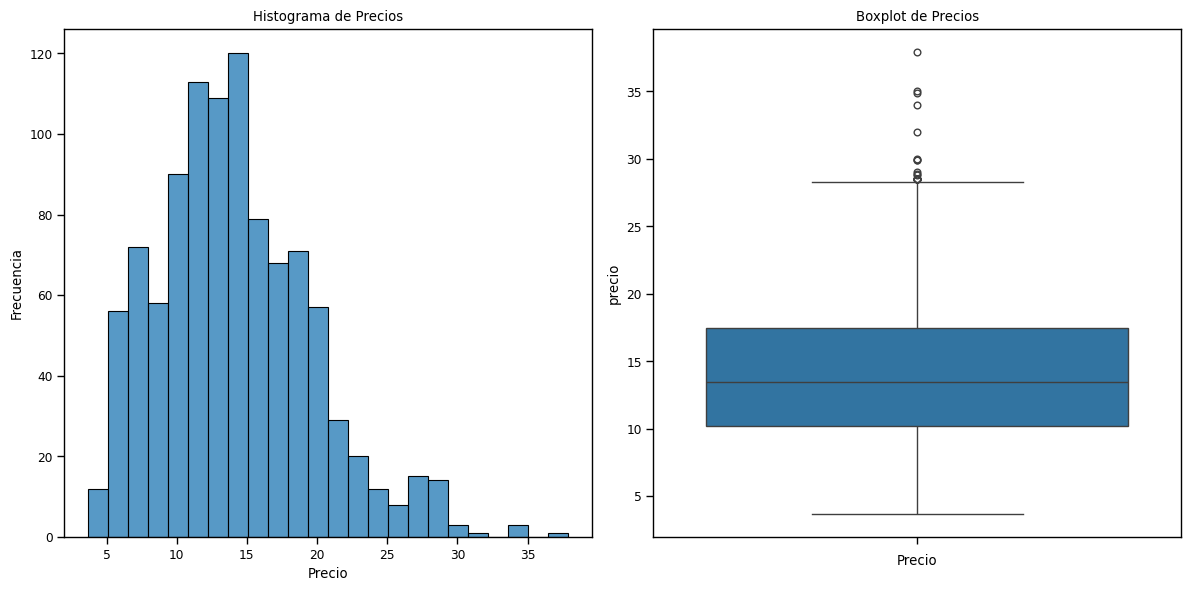

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histograma a la izquierda
sns.histplot(df_eda['precio'], kde=False, ax=axes[0])
axes[0].set_title('Histograma de Precios')
axes[0].set_xlabel('Precio')
axes[0].set_ylabel('Frecuencia')

# Diagrama de caja (boxplot) a la derecha
sns.boxplot(y=df_eda['precio'], ax=axes[1])
axes[1].set_title('Boxplot de Precios')
axes[1].set_xlabel('Precio')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


### Relación entre kilometraje y precio

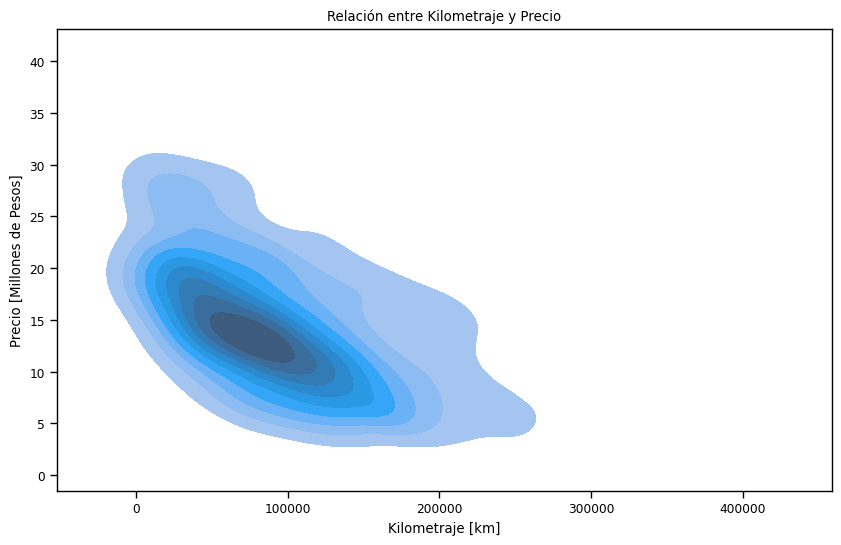

In [15]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x='kilometraje', y='precio', data=df_eda[df_eda.kilometraje < 700000], fill=True)
plt.title('Relación entre Kilometraje y Precio')
plt.xlabel('Kilometraje [km]')
plt.ylabel('Precio [Millones de Pesos]')
plt.show()


### Relación entre tipo de combustible y precio

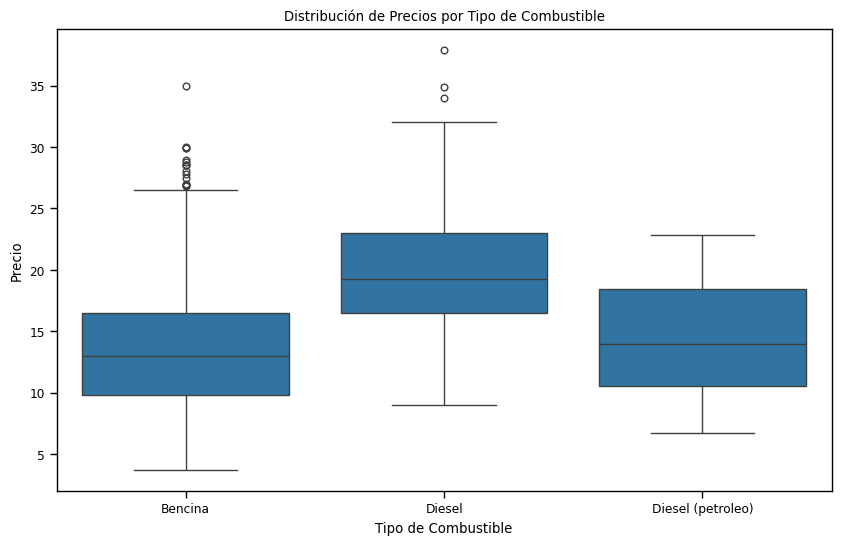

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='combustible', y='precio', data=df)
plt.title('Distribución de Precios por Tipo de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio')
plt.show()


Hay 2 valore que hacen referencia a combustible Diesel.

In [17]:
df['combustible'] = df.combustible.replace('Diesel (petroleo)', 'Diesel')
df_eda["combustible"] = df.combustible

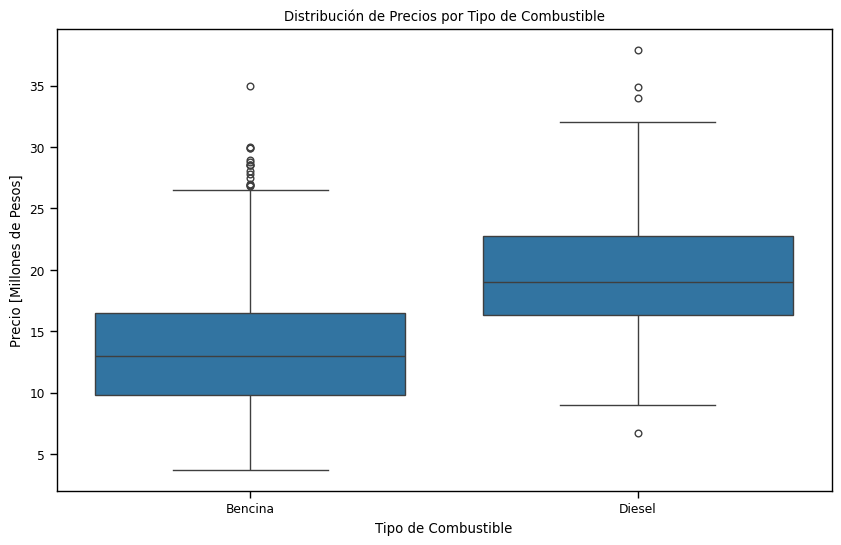

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='combustible', y='precio', data=df_eda)
plt.title('Distribución de Precios por Tipo de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio [Millones de Pesos]')
plt.show()

### Relación entre tipo de transmición y precio

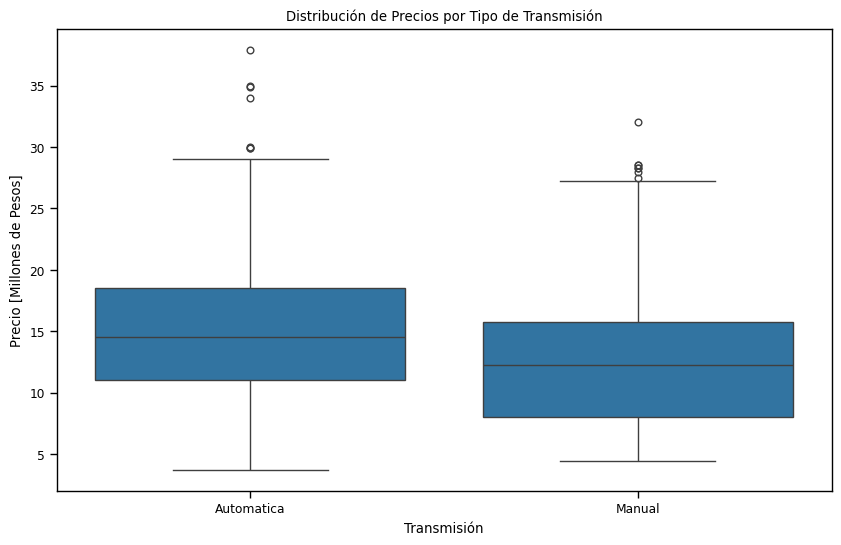

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmision', y='precio', data=df)
plt.title('Distribución de Precios por Tipo de Transmisión')
plt.xlabel('Transmisión')
plt.ylabel('Precio [Millones de Pesos]')
plt.show()


### Relación entre Año y precio

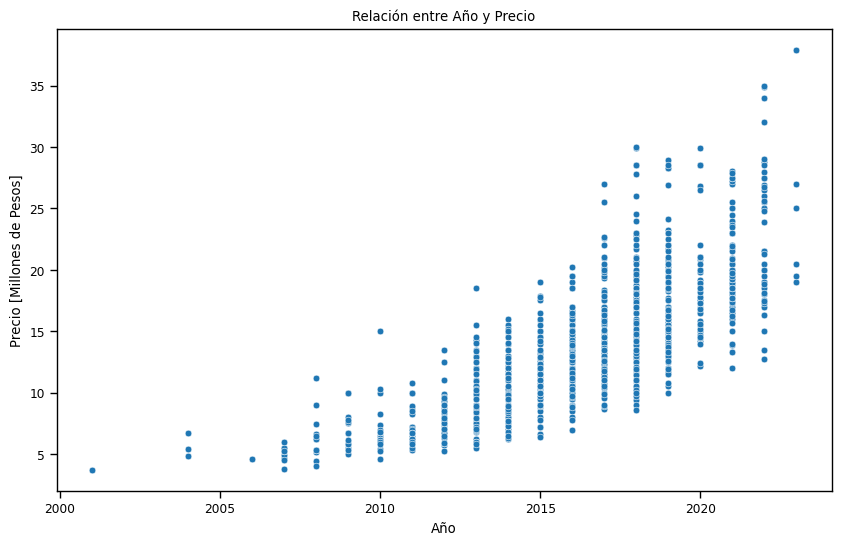

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='año', y='precio', data=df_eda[df_eda.año > 2000])
plt.title('Relación entre Año y Precio')
plt.xlabel('Año')
plt.ylabel('Precio [Millones de Pesos]')
plt.show()

### Relación entre kilometraje y precio

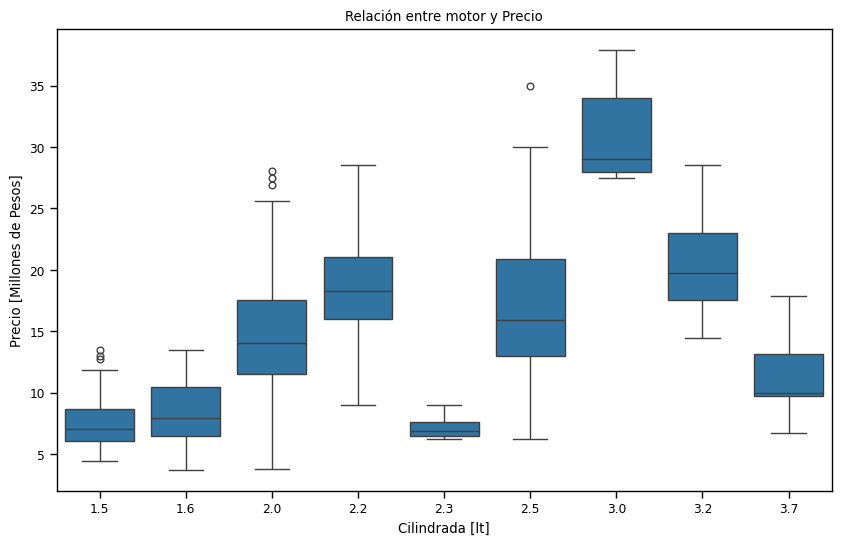

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='motor', y='precio', data=df[df.kilometraje < 700000])
plt.title('Relación entre motor y Precio')
plt.xlabel('Cilindrada [lt]')
plt.ylabel('Precio [Millones de Pesos]')
plt.show()

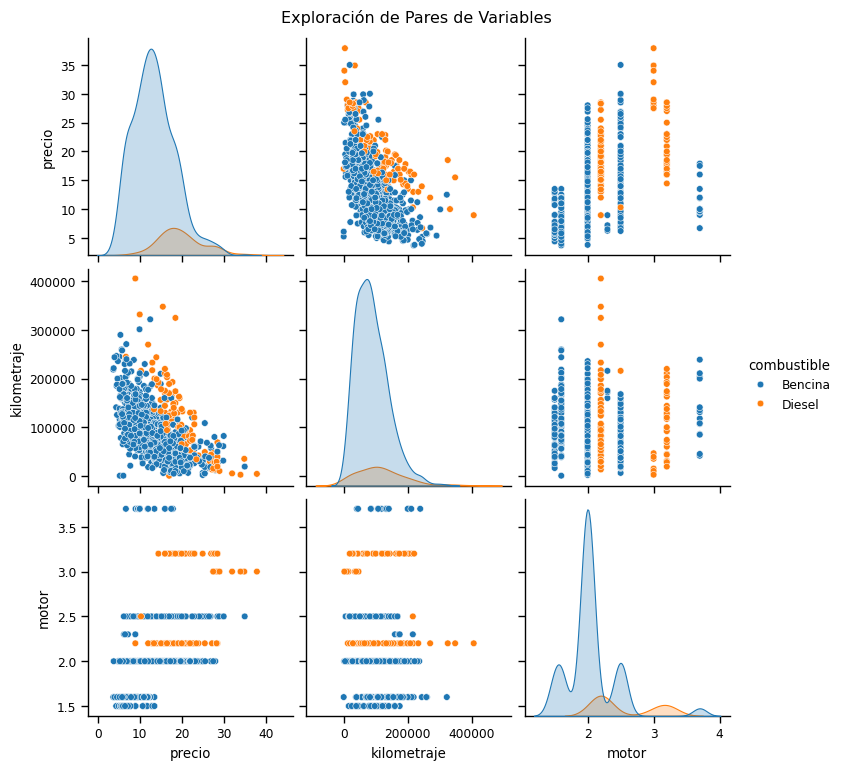

In [22]:
sns.pairplot(df_eda[df_eda.kilometraje < 700000], vars=['precio', 'kilometraje', 'motor'], hue='combustible')
plt.suptitle('Exploración de Pares de Variables', y=1.02)
plt.show()


### Kilometraje por año

In [23]:
# Obtener el año actual
year_current = datetime.now().year

# Crear la columna de cantidad de años del auto
df_eda['años_auto'] = year_current - df_eda['año']

# Crear la columna de kilometraje por año
df_eda['kilometraje_por_año'] = df_eda['kilometraje'] / df_eda['años_auto']

df_eda

,marca,modelo,motor,combustible,kilometraje,transmision,precio,localidad,region,año,años_auto,kilometraje_por_año
0,MAZDA,MAZDA6,2.0,Bencina,103900,Automatica,10.00,Puente Alto,Región Metropolitana de Santiago,2013,11,9445.454545
1,MAZDA,BT-50,3.2,Diesel,92000,Automatica,20.90,Vitacura,Región Metropolitana de Santiago,2020,4,23000.000000
2,MAZDA,BT-50,2.2,Diesel,94000,Manual,21.70,Galvarino,Región de La Araucanía,2019,5,18800.000000
3,NaN,NaN,NaN,Bencina,25000,Automatica,19.80,Vina del Mar,Región de Valparaíso,2020,4,6250.000000
4,MAZDA,MAZDA2,1.5,Bencina,61450,Manual,7.39,NaN,None,2013,11,5586.363636
...,...,...,...,...,...,...,...,...,...,...,...,...
1007,NaN,NaN,NaN,Bencina,146000,Manual,10.50,Concon,Región de Valparaíso,2015,9,16222.222222
1008,MAZDA,MAZDA3,2.0,Bencina,60000,Automatica,11.20,Colina,Región Metropolitana de Santiago,2016,8,7500.000000
1009,MAZDA,CX-5,2.0,Bencina,71000,Manual,17.29,Puerto Varas,Región de Los Lagos,2020,4,17750.000000
1010,MAZDA,CX-5,2.0,Bencina,27500,Automatica,19.75,Santiago,Región Metropolitana de Santiago,2021,3,9166.666667


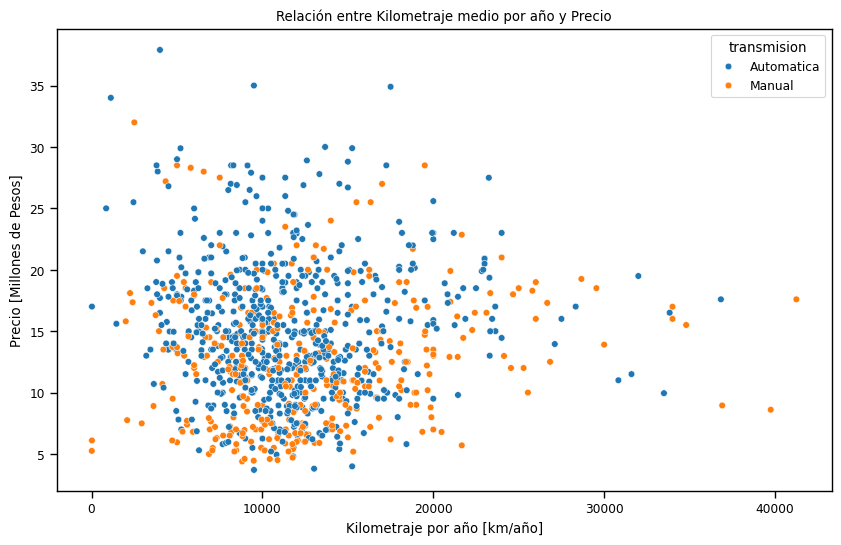

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kilometraje_por_año', y='precio', data=df_eda[df_eda.kilometraje_por_año < 80_000], hue="transmision")
plt.title('Relación entre Kilometraje medio por año y Precio')
plt.xlabel('Kilometraje por año [km/año]')
plt.ylabel('Precio [Millones de Pesos]')
plt.show()

### Matriz de correlación

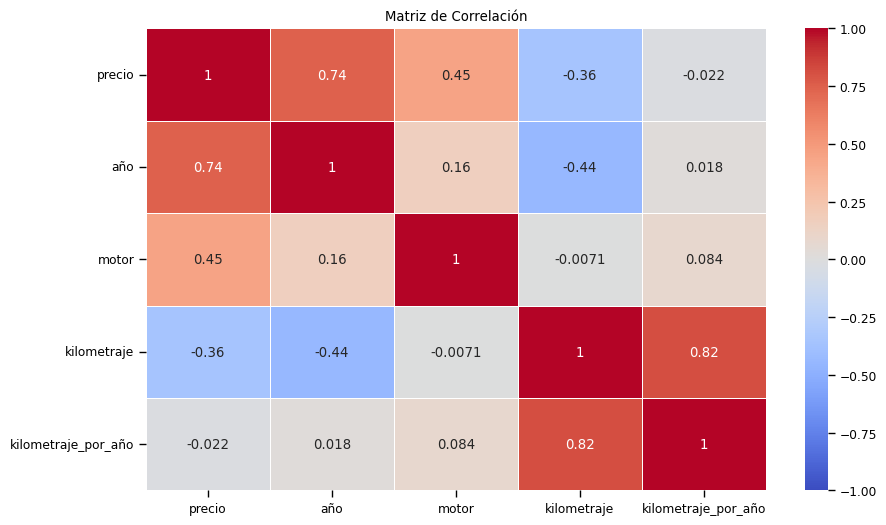

In [25]:
plt.figure(figsize=(10, 6))
correlation_matrix = df_eda[["precio", "año", "motor", "kilometraje", "kilometraje_por_año"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1)
plt.title('Matriz de Correlación')
plt.show()


#### Matriz de correlacion por modelo

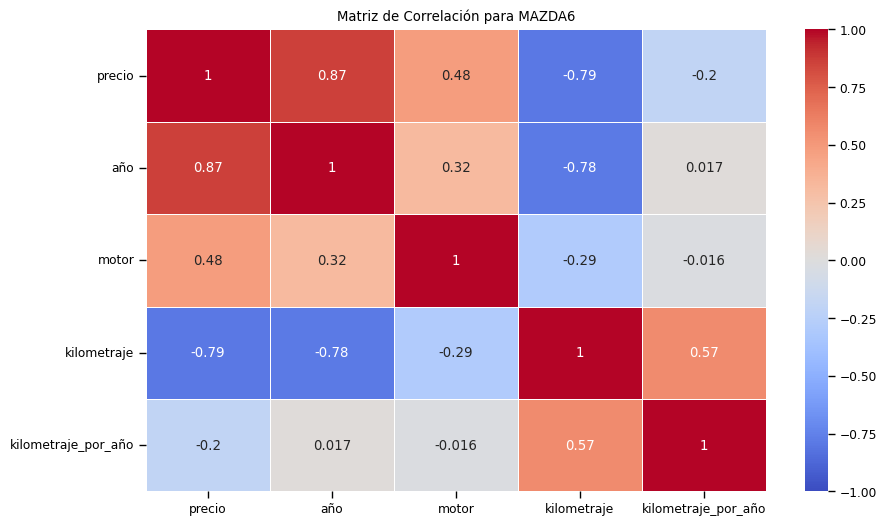

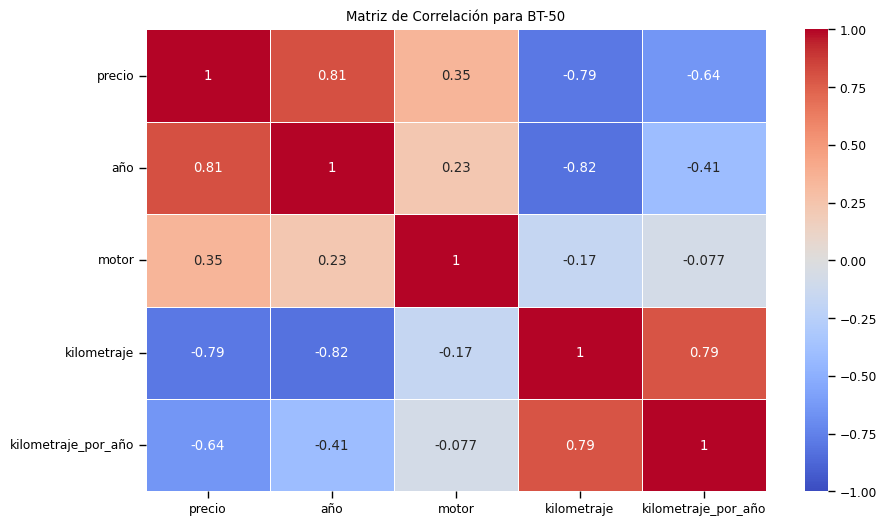

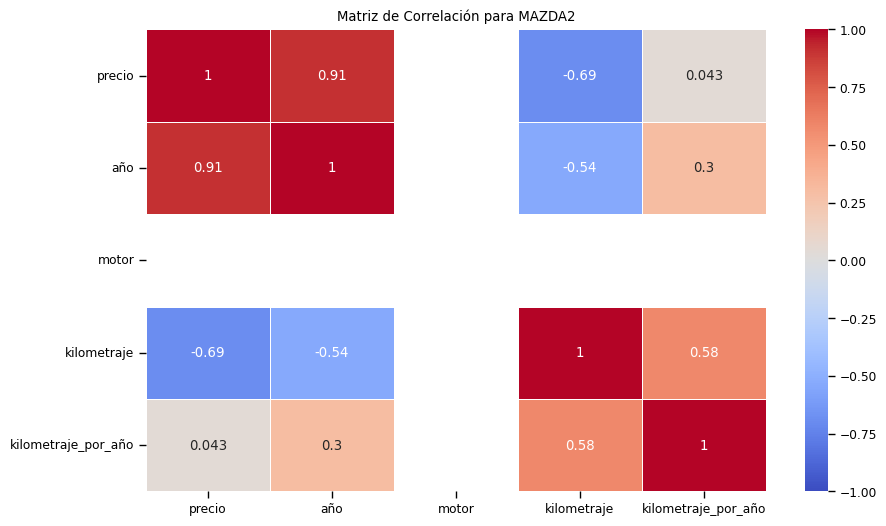

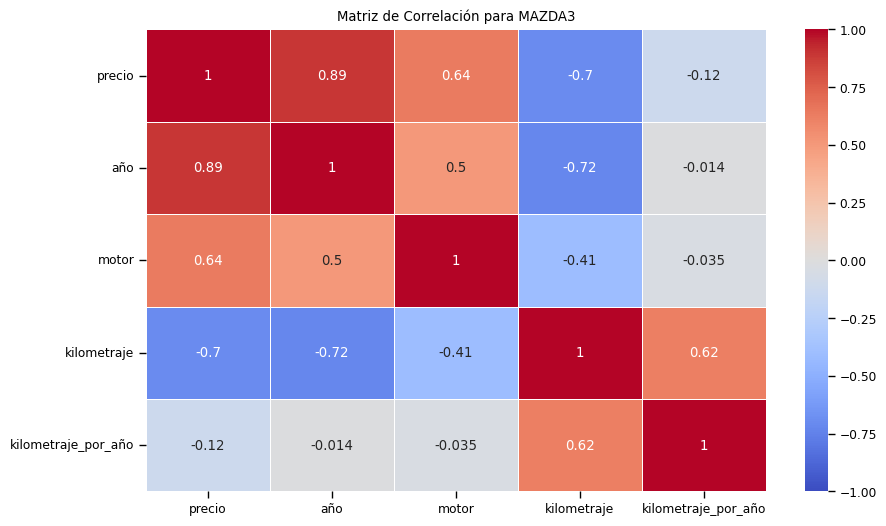

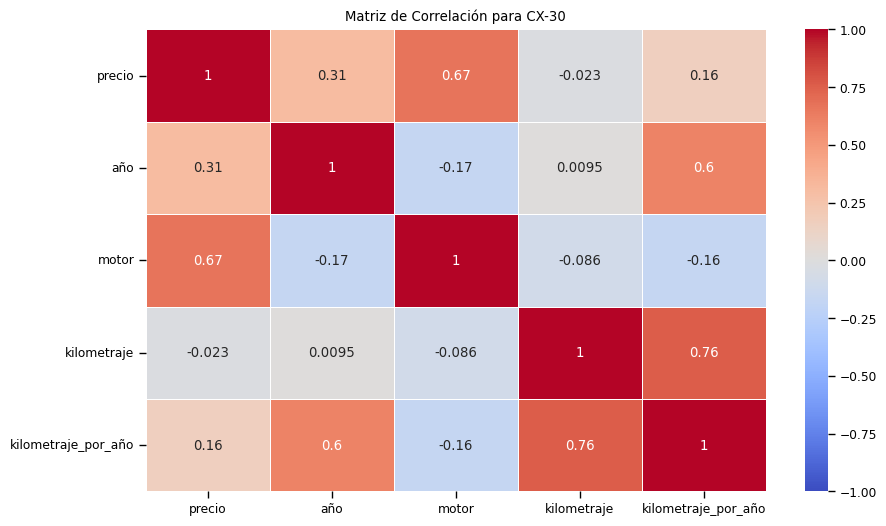

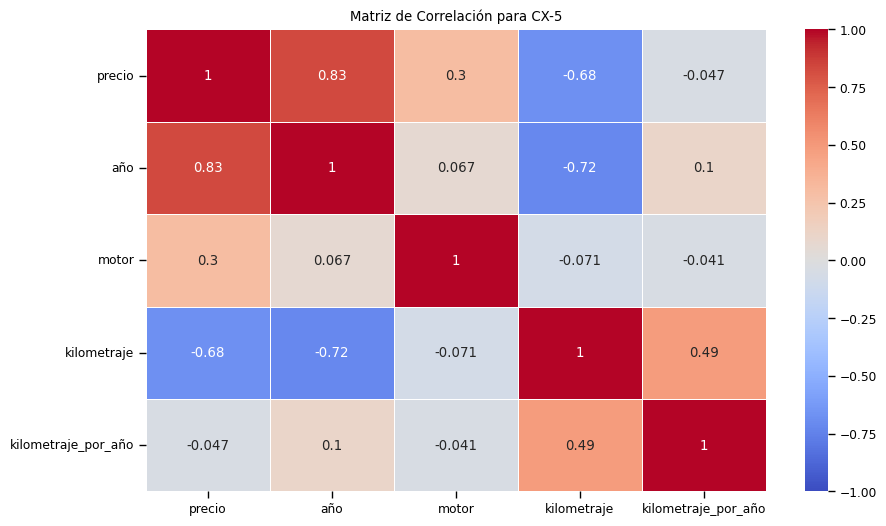

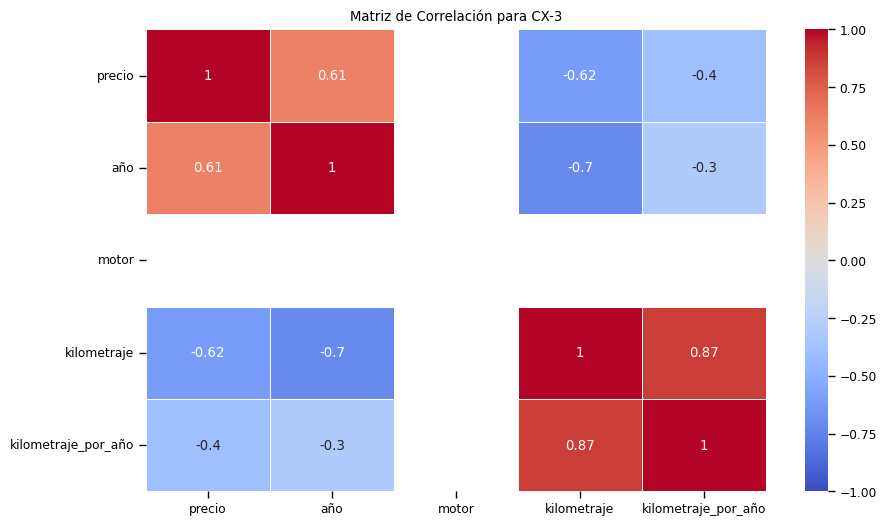

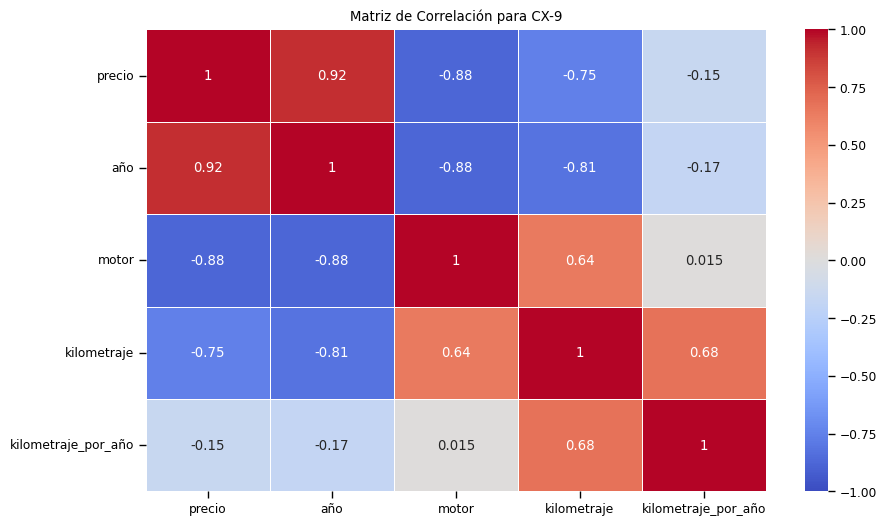

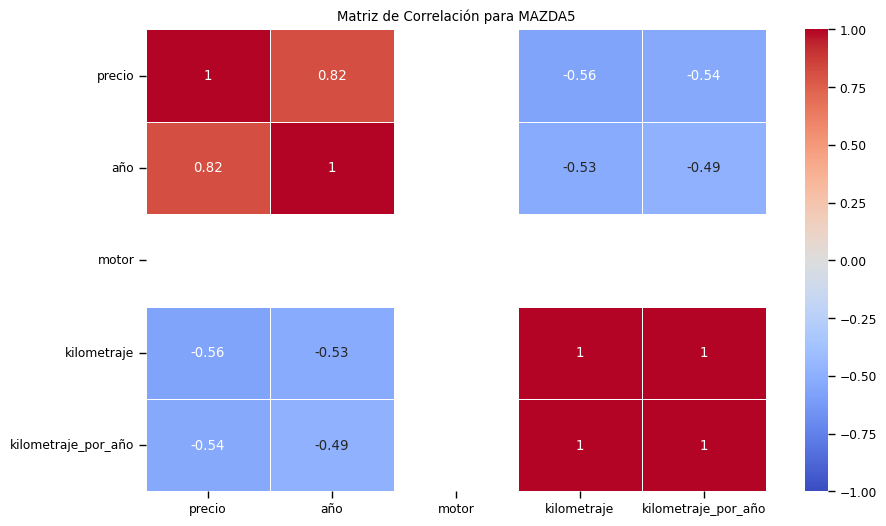

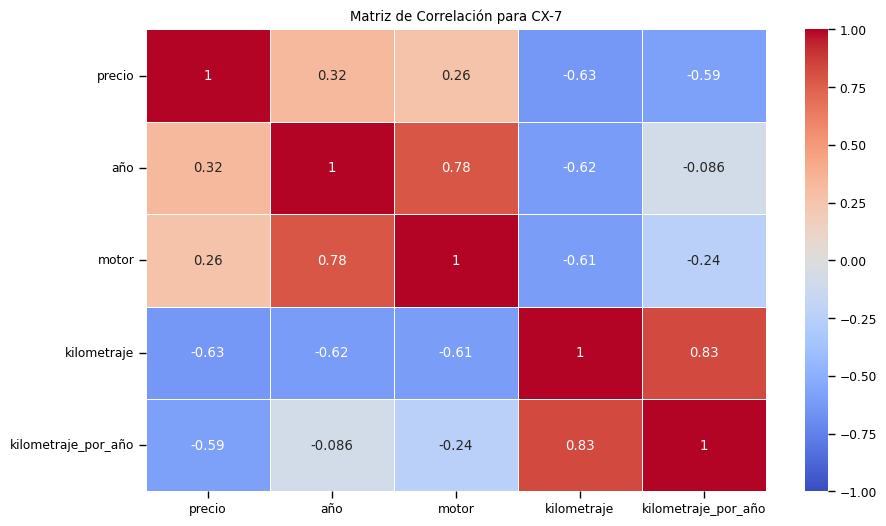

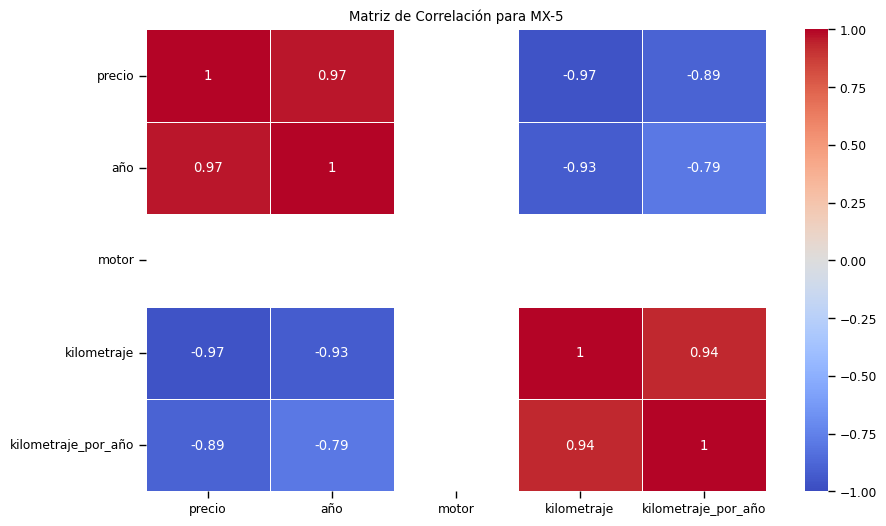

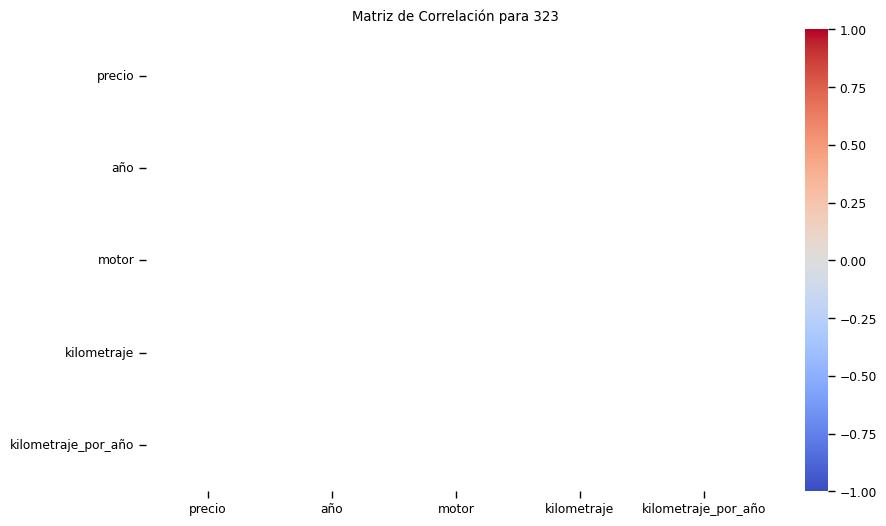

In [26]:
# Obtener los valores únicos del modelo
unique_models = df_eda.modelo.dropna().unique()

# Iterar sobre cada modelo y generar un heatmap de correlación
for model in unique_models:
    # Filtrar el DataFrame por el modelo actual
    df_model = df_eda[df_eda.modelo == model]

    # Crear la matriz de correlación
    correlation_matrix = df_model[["precio", "año", "motor", "kilometraje", "kilometraje_por_año"]].corr()

    # Graficar el heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
    plt.title(f'Matriz de Correlación para {model}')
    plt.show()


In [27]:
df_clean = df.copy()
df_clean = df_clean[(df_clean.año >= 2000) & (df_clean.kilometraje <  2_000_000)]

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_clean[["marca", "modelo", "motor", "combustible", "kilometraje", "transmision", "region", "año"]], df_clean.precio, test_size=0.3, random_state=42) 

In [29]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from pandas.api.types import CategoricalDtype
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict, learning_curve, GridSearchCV, RandomizedSearchCV

In [38]:
num_attribs = ["motor", "kilometraje", "año"]
cat_attribs = ["marca", "modelo", "combustible", "transmision", "region"]

num_pipeline = make_pipeline(SimpleImputer(strategy="median"))
num_pipeline_scaled = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

preprocessing_scaled = make_column_transformer(
    (num_pipeline_scaled, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [31]:
def plot_predicted_vs_measured(estimator, X, y, cv=None, alpha=0.5):
    predicted = cross_val_predict(estimator, X, y, cv=cv)
    fig, ax = plt.subplots()
    ax.scatter(y, predicted, alpha=alpha)
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.title(str(estimator.__class__).replace("'>", '').split('.')[-1])
    plt.show()
    
def display_validation_scores(estimator, X, y, cv=10):
    scores = np.sqrt(-cross_val_score(estimator, X, y, scoring="neg_mean_squared_error", cv=cv))
    print("Scores:", scores)
    print(f"Mean: {scores.mean():.3}")
    print(f"Standar deviation: {scores.std():.3}")

In [32]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, PolynomialFeatures(), LinearRegression())
lin_reg.set_params(polynomialfeatures__degree=1, polynomialfeatures__include_bias=False)
lin_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000299D12201F0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000299D1221210>)])),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('linearregression', LinearRegression())])

In [33]:
print(f"RMSE = {root_mean_squared_error(y_train, lin_reg.predict(X_train)):.3f}")

RMSE = 2.766


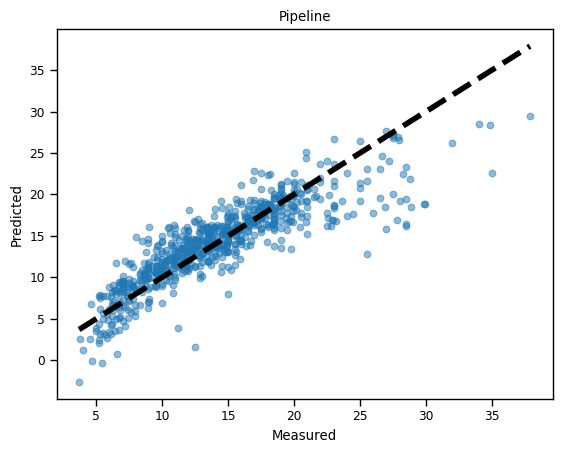

In [34]:
plot_predicted_vs_measured(lin_reg, X_train, y_train, cv=5)

In [35]:
lin_reg.score(X_train, y_train)

0.7570220306460563

In [36]:
params_lr = [{"polynomialfeatures__degree": range(1,5)}]
lr_search = GridSearchCV(lin_reg, params_lr, scoring="neg_mean_squared_error", n_jobs=1, verbose=2).fit(X_train, y_train)
lr_results = pd.DataFrame(lr_search.cv_results_).sort_values("rank_test_score", ascending=True).head()
lr_results["mean_test_score"] = np.sqrt(-lr_results["mean_test_score"])
best_lr = lr_search.best_estimator_
display(lr_results)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=3; total time=   0.0s
[CV] END .......................polynomialfeature

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013496,0.001416,0.005601,0.000489,1,{'polynomialfeatures__degree': 1},-6.298819,-8.629074,-8.341894,-10.233187,-6.338168,2.822805,1.493346,1
1,0.015692,0.002035,0.006706,0.000743,2,{'polynomialfeatures__degree': 2},-14.555485,-14.042575,-14.960049,-18.384038,-20.708663,4.065730,2.586481,2
2,0.019703,0.001069,0.007001,0.000639,3,{'polynomialfeatures__degree': 3},-16.892484,-20.940670,-22.411444,-22.210587,-22.934976,4.591082,2.193016,3
3,44.442724,2.297188,44.507005,2.319428,4,{'polynomialfeatures__degree': 4},-17.479233,-22.331712,-22.131284,-23.574332,-25.624088,4.714672,2.680184,4


# SVM

In [39]:
from sklearn.svm import SVR

svm = make_pipeline(preprocessing_scaled, SVR(kernel="linear"))
svm.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000299D3835630>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000299CFA4E3B0>)])),
                ('svr', SVR(kernel='linear'))])

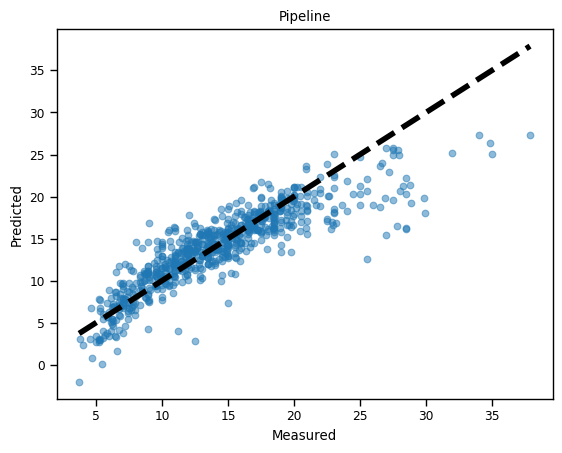

In [40]:
plot_predicted_vs_measured(svm, X_train, y_train, cv=5)

In [41]:
svm.score(X_train, y_train)

0.7753649415972697

In [42]:
print(f"RMSE = {root_mean_squared_error(y_train, svm.predict(X_train)):.3f}")

RMSE = 2.660


In [44]:
params_SVM = [{"svr__kernel": ["linear", "rbf"], "svr__C":  [0.1, 1, 10, 100], "svr__gamma": ["scale", "auto"]},
          {"svr__kernel": ["poly"], "svr__degree": range(1,5), "svr__C": [0.1, 1, 10, 100], "svr__epsilon": [.1, .5, 1 , 1.5]}]

svm_search = GridSearchCV(svm, params_SVM, scoring="neg_mean_squared_error", n_jobs=1, verbose=2).fit(X_train, y_train)
svm_results = pd.DataFrame(svm_search.cv_results_).sort_values("rank_test_score", ascending=True).head()
svm_results["mean_test_score"] = np.sqrt(-svm_results["mean_test_score"])
best_svm = svm_search.best_estimator_
display(svm_results)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END ...svr__C=0.1, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END ...svr__C=0.1, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END ...svr__C=0.1, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END ...svr__C=0.1, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END ...svr__C=0.1, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END ......svr__C=0.1, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END ......svr__C=0.1, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END ......svr__C=0.1, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END ......svr__C=0.1, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END ......svr__C=0.1, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END ....svr__C=0.1, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END ....svr__C=0.1, svr__gamma=auto, svr__

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svr__C,param_svr__gamma,param_svr__kernel,param_svr__degree,param_svr__epsilon,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,0.026031,0.001319,0.007192,0.000378,10.0,auto,rbf,NaN,NaN,"{'svr__C': 10, 'svr__gamma': 'auto', 'svr__ker...",-4.338580,-6.898460,-6.234195,-7.488412,-4.734518,2.436972,1.218236,1
15,0.040634,0.000987,0.007100,0.000212,100.0,auto,rbf,NaN,NaN,"{'svr__C': 100, 'svr__gamma': 'auto', 'svr__ke...",-4.603483,-7.331860,-6.467410,-7.048421,-4.426474,2.444490,1.225950,2
9,0.031599,0.002092,0.007795,0.000745,10.0,scale,rbf,NaN,NaN,"{'svr__C': 10, 'svr__gamma': 'scale', 'svr__ke...",-4.684648,-6.894360,-6.673635,-6.729121,-4.898825,2.444610,0.972128,3
53,0.032424,0.001638,0.006596,0.000482,10.0,NaN,poly,2.0,0.5,"{'svr__C': 10, 'svr__degree': 2, 'svr__epsilon...",-4.413431,-7.326817,-6.579767,-6.928491,-4.724535,2.448389,1.191850,4
52,0.035323,0.004454,0.006911,0.000486,10.0,NaN,poly,2.0,0.1,"{'svr__C': 10, 'svr__degree': 2, 'svr__epsilon...",-4.533770,-7.152222,-6.527842,-6.987565,-5.100966,2.461803,1.050840,5


# Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor

rf = make_pipeline(preprocessing, RandomForestRegressor())
rf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000299D3835E10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000299CFA4DCF0>)])),
                ('randomforestregressor', RandomForestRegressor())])

In [47]:
print(f"RMSE = {root_mean_squared_error(y_train, rf.predict(X_train)):.3f}")

RMSE = 1.016


In [49]:
rf.score(X_train, y_train)

0.9672245076174123

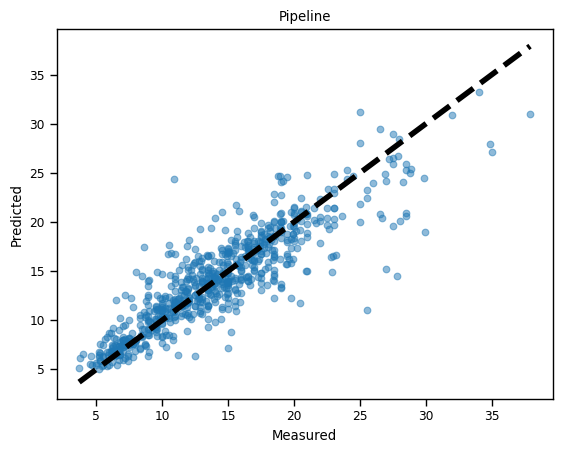

In [48]:
plot_predicted_vs_measured(rf, X_train, y_train, cv=10)

In [50]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['log2', 'sqrt', None]

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'randomforestregressor__n_estimators': n_estimators,
               'randomforestregressor__max_features': max_features,
               'randomforestregressor__max_depth': max_depth,
               'randomforestregressor__min_samples_split': min_samples_split,
               'randomforestregressor__min_samples_leaf': min_samples_leaf,
               'randomforestregressor__bootstrap': bootstrap,
               }

rf_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=1, random_state=42, n_jobs = 1, 
                              scoring="neg_mean_squared_error").fit(X_train, y_train)

rf_results = pd.DataFrame(rf_search.cv_results_).sort_values("rank_test_score", ascending=True).head()
rf_results["mean_test_score"] = np.sqrt(-rf_results["mean_test_score"])
best_forest = rf_search.best_estimator_

display(rf_results)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__n_estimators,param_randomforestregressor__min_samples_split,param_randomforestregressor__min_samples_leaf,param_randomforestregressor__max_features,param_randomforestregressor__max_depth,param_randomforestregressor__bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,4.688467,0.046465,0.080483,0.002638,1400,5,1,None,20,True,"{'randomforestregressor__n_estimators': 1400, ...",-4.728602,-8.014272,-7.586047,-7.059812,-6.751545,2.613055,1.135688,1
7,1.377540,0.040717,0.069791,0.005504,1200,10,2,log2,None,False,"{'randomforestregressor__n_estimators': 1200, ...",-4.965234,-7.543949,-7.067016,-8.144575,-7.750921,2.663520,1.119828,2
5,0.870739,0.029260,0.036945,0.003276,600,2,2,sqrt,None,True,"{'randomforestregressor__n_estimators': 600, '...",-5.109092,-7.659649,-7.164510,-8.559458,-7.433797,2.680541,1.138959,3
0,0.257627,0.012642,0.015203,0.000747,200,10,2,log2,40,True,"{'randomforestregressor__n_estimators': 200, '...",-5.341713,-7.856696,-7.306640,-9.094091,-7.701029,2.731306,1.216255,4
2,3.835767,0.048394,0.094370,0.003647,1400,2,1,sqrt,80,False,"{'randomforestregressor__n_estimators': 1400, ...",-5.275223,-8.534172,-7.145148,-7.920080,-8.901722,2.748685,1.286164,5


In [62]:
# Define the parameter grid, now with more focused ranges
param_grid = {
    'randomforestregressor__n_estimators': [1300, 1400, 1500],
    'randomforestregressor__max_features': [None, 'log2'],
    'randomforestregressor__max_depth': [15, 20, 25],
    'randomforestregressor__min_samples_split': [3, 5, 7],
    'randomforestregressor__min_samples_leaf': [1, 2],
    'randomforestregressor__bootstrap': [True, False]
}

# Create the RandomizedSearchCV object
rf2_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5,  # Cross-validation with 5 folds
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring="neg_mean_squared_error"
)

# Fit the model
rf2_search.fit(X_train, y_train)

rf2_results = pd.DataFrame(rf2_search.cv_results_).sort_values("rank_test_score", ascending=True).head()
rf2_results["mean_test_score"] = np.sqrt(-rf2_results["mean_test_score"])
best_forest = rf2_search.best_estimator_

display(rf2_results)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__n_estimators,param_randomforestregressor__min_samples_split,param_randomforestregressor__min_samples_leaf,param_randomforestregressor__max_features,param_randomforestregressor__max_depth,param_randomforestregressor__bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,4.837857,0.106727,0.147026,0.004381,1300,3,1,log2,15,True,"{'randomforestregressor__n_estimators': 1300, ...",-4.556491,-7.263075,-6.569406,-7.289800,-6.785542,2.548110,1.006915,1
35,5.915225,0.196030,0.194247,0.023800,1500,3,1,log2,15,False,"{'randomforestregressor__n_estimators': 1500, ...",-4.713171,-7.600355,-6.463306,-7.181786,-6.849499,2.561567,0.997284,2
45,5.641317,0.290859,0.179237,0.009999,1500,5,1,log2,25,True,"{'randomforestregressor__n_estimators': 1500, ...",-4.405617,-7.444477,-6.492711,-7.366517,-7.458329,2.575564,1.171207,3
43,4.820099,0.253152,0.153535,0.006512,1300,5,1,log2,25,True,"{'randomforestregressor__n_estimators': 1300, ...",-4.328142,-7.498716,-6.611903,-7.424656,-7.489849,2.582761,1.217875,4
39,5.061629,0.270794,0.179334,0.011448,1500,7,1,log2,25,True,"{'randomforestregressor__n_estimators': 1500, ...",-4.465431,-7.422258,-6.604439,-7.518134,-7.363792,2.583566,1.151597,5


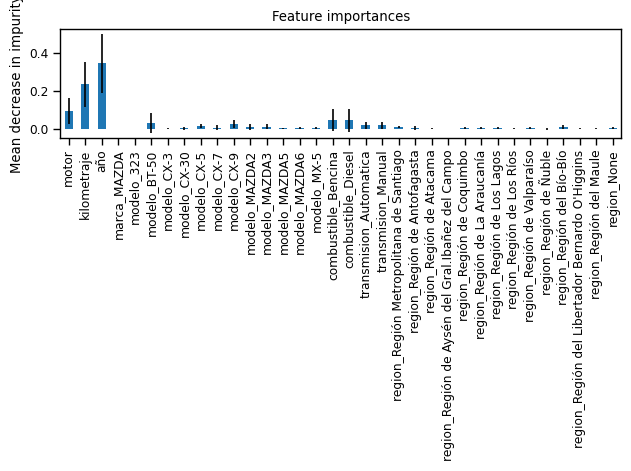

In [63]:
importances = rf2_search.best_estimator_._final_estimator.feature_importances_
features_names = [feature.split("__")[1] for feature in best_forest[:-1].get_feature_names_out()]
std = np.std([tree.feature_importances_ for tree in best_forest._final_estimator.estimators_], axis=0)
forest_importances = pd.Series(importances, index=features_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [64]:
from sklearn.ensemble import VotingRegressor

ensamble = VotingRegressor(estimators=[('linear', best_lr), ('svm', best_svm), ('rf', rf_search.best_estimator_)]).fit(X_train, y_train)


In [66]:
print(f"RMSE = {root_mean_squared_error(y_train, ensamble.predict(X_train)):.3f}")

RMSE = 2.011


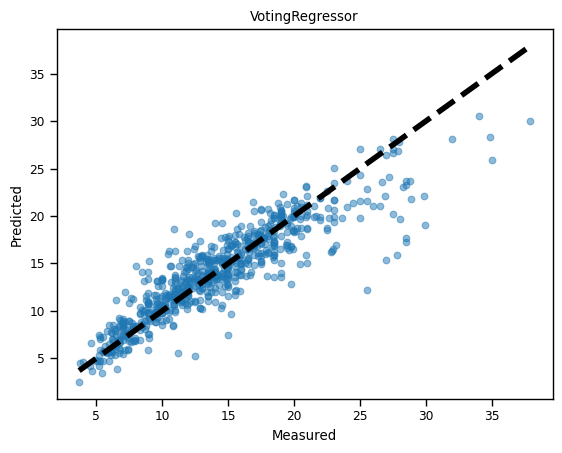

In [67]:
plot_predicted_vs_measured(ensamble, X_train, y_train, cv=10)

# Conjunto de test

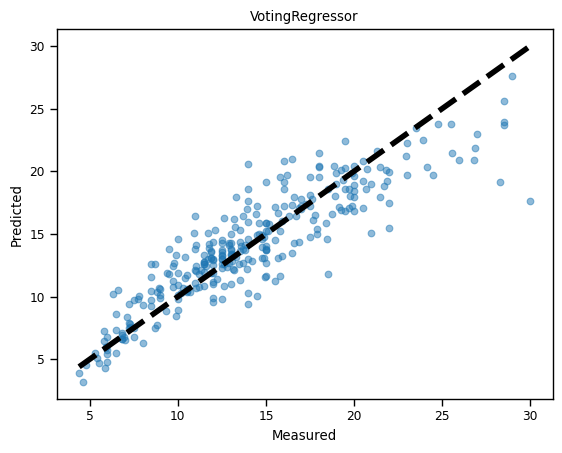

In [68]:
plot_predicted_vs_measured(ensamble, X_test, y_test, cv=10)

In [69]:
print(f"RMSE = {root_mean_squared_error(y_test, ensamble.predict(X_test)):.3f}")

RMSE = 2.213


# Serialización modelo

In [73]:
import joblib

X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)
final_model = ensamble = VotingRegressor(estimators=[('linear', best_lr), ('svm', best_svm), ('rf', rf_search.best_estimator_)]).fit(X, y)
joblib.dump(final_model, "autos_model_mazda.pkl")

['autos_model_mazda.pkl']